# 1) Loading corpus

In [3]:
from datasets import load_dataset

ds = load_dataset("clarin-knext/fiqa-pl", "corpus")

In [4]:
import random

random.seed(2137)
ds_t1000 = []

for obj in random.sample(list(ds['corpus']),1000):
  ds_t1000.append(obj['text'])

ds_t1000[:3]


['Nie jestem również adwokatem ani doradcą podatkowym. Tak, czynsz, który płacisz swojemu przyjacielowi, jest dochodem podlegającym opodatkowaniu, ale nagle wszelkiego rodzaju wydatki związane z domem – w tym ułamek odsetek zapłaconych od kredytu hipotecznego – stają się odliczane od podatku. Załóżmy na przykład, że kredyt hipoteczny wynosi 1000 zł miesięcznie, a płacisz znajomemu 500 zł miesięcznie. Jeśli mieszkasz w 50% domu, może on odliczyć 50% (plus lub minus) wydatków związanych z posiadaniem domu, w tym: Wszystkie te rzeczy (w każdym razie 50% z nich) podlegają odliczeniu od podatku. Byłoby całkiem możliwe, że poniósłby stratę na przedsięwzięciu i faktycznie co roku obniżał podatki. Dopóki nie nadejdzie czas na sprzedaż; sprzedaż nieruchomości, która była używana jako najem, jest bardziej opodatkowana niż sprzedaż nieruchomości, która była miejscem zamieszkania.',
 '„Jeden scenariusz opisany w pierwotnym pytaniu – niewtajemniczony, który handluje po nieformalnych rozmowach ze zn

# 2) Using lemmatization and sentence splitting 

to identify the expressions that consist of consecutive words starting with a capital letter (you will have to look at the inflected form of the word to check its capitalization) that do not occupy the first position in a sentence. E.g. the sentence:


In [16]:
!python -m spacy download pl_core_news_lg

     ---------------------------------------- 0.0/573.7 MB ? eta -:--:--
     -------------------------------------- 0.0/573.7 MB 330.3 kB/s eta 0:28:57
     -------------------------------------- 0.0/573.7 MB 330.3 kB/s eta 0:28:57
     -------------------------------------- 0.1/573.7 MB 491.5 kB/s eta 0:19:28
     -------------------------------------- 0.2/573.7 MB 833.5 kB/s eta 0:11:29
     ---------------------------------------- 0.2/573.7 MB 1.1 MB/s eta 0:09:02
     ---------------------------------------- 0.3/573.7 MB 1.2 MB/s eta 0:08:17
     ---------------------------------------- 0.4/573.7 MB 1.2 MB/s eta 0:07:53
     ---------------------------------------- 0.5/573.7 MB 1.3 MB/s eta 0:07:27
     ---------------------------------------- 0.5/573.7 MB 1.3 MB/s eta 0:07:26
     ---------------------------------------- 0.6/573.7 MB 1.3 MB/s eta 0:07:10
     ---------------------------------------- 0.7/573.7 MB 1.3 MB/s eta 0:07:11
     ---------------------------------------- 0


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import spacy
nlp = spacy.load('pl_core_news_lg') 

In [23]:
nlp.pipe_labels['ner']

['date', 'geogName', 'orgName', 'persName', 'placeName', 'time']

In [28]:
docs = list(nlp.pipe(ds_t1000))
docs[0]

Nie jestem również adwokatem ani doradcą podatkowym. Tak, czynsz, który płacisz swojemu przyjacielowi, jest dochodem podlegającym opodatkowaniu, ale nagle wszelkiego rodzaju wydatki związane z domem – w tym ułamek odsetek zapłaconych od kredytu hipotecznego – stają się odliczane od podatku. Załóżmy na przykład, że kredyt hipoteczny wynosi 1000 zł miesięcznie, a płacisz znajomemu 500 zł miesięcznie. Jeśli mieszkasz w 50% domu, może on odliczyć 50% (plus lub minus) wydatków związanych z posiadaniem domu, w tym: Wszystkie te rzeczy (w każdym razie 50% z nich) podlegają odliczeniu od podatku. Byłoby całkiem możliwe, że poniósłby stratę na przedsięwzięciu i faktycznie co roku obniżał podatki. Dopóki nie nadejdzie czas na sprzedaż; sprzedaż nieruchomości, która była używana jako najem, jest bardziej opodatkowana niż sprzedaż nieruchomości, która była miejscem zamieszkania.

In [29]:
#lemmatizer = nlp.add_pipe("lemmatizer")
sentencizer = nlp.add_pipe("sentencizer")

In [30]:
from collections import Counter

counter = Counter()

for doc in docs:
  for sent in doc.sents:
      tokens = list(sent)
      for token in tokens:
         #check if the token is punctuation and chec if first letter is uppper case and check if token is the begining of the sentence
         if not token.is_punct and token.lemma_[0].isupper() and token != tokens[0]:
            counter[token.lemma_] += 1
  

In [31]:
for word, count in counter.most_common():
    print(f"{word}: {count}")

USA: 84
IRA: 75
Twój: 60
Stany: 41
Zjednoczone: 40
Ciebie: 40
ETF: 36
Roth: 30
K: 27
B: 25
IRS: 25
Twojej: 19
Indie: 19
Apple: 18
Internet: 18
S&P: 18
FDIC: 17
SIPC: 16
C: 15
Kanada: 14
Europa: 14
Wielki: 14
Brytania: 14
Graham: 14
Google: 13
MBS: 12
Twojego: 12
S: 12
X: 12
Amazon: 12
CDO: 11
Facebook: 11
Twoich: 11
A: 11
Microsoft: 11
Uber: 11
E: 10
LLC: 10
SPY: 10
IPO: 10
Ameryka: 10
CAD: 10
IB: 10
CD: 9
Vanguard: 9
FHA: 9
The: 9
ITM: 9
P: 9
Publishing: 9
PE: 9
Yelp: 9
I: 9
Windows: 8
PKB: 8
GE: 8
Big: 8
Trump: 8
Reddit: 8
CPA: 8
Fed: 8
CA: 8
Sears: 8
US: 8
Ty: 8
RMD: 8
Walmart: 7
Twoją: 7
Kalifornia: 7
PayPal: 7
JP: 6
Morgan: 6
DB: 6
Australia: 6
Jack: 6
Zimbabwe: 6
Paypal: 6
QE: 6
HR: 6
RRSP: 6
Money: 6
Quicken: 6
Goldman: 6
McDonald's: 6
BMV: 6
ISO: 6
Best: 6
Visa: 6
Corp: 6
Panasonic: 6
Tesla: 6
Bajaj: 6
UE: 6
L1: 6
Venturo: 6
OPEC: 5
FAQ](http://np.reddit.com: 5
Opinie](http://np.reddit.com: 5
PM: 5
Melbourne: 5
Chicago: 5
HFT: 5
Afryka: 5
Mac: 5
CAGR: 5
Jork: 5
GPA: 5
Standard:

# 3) Using ner

In [32]:
nlp.pipe_names

['tok2vec',
 'morphologizer',
 'parser',
 'lemmatizer',
 'tagger',
 'attribute_ruler',
 'ner',
 'sentencizer']

In [33]:
nlp.pipe_labels['ner']

['date', 'geogName', 'orgName', 'persName', 'placeName', 'time']

In [36]:
from collections import Counter

counter_entities  = Counter()

for doc in docs:
  for sent in doc.ents:
      counter_entities[sent.label_] += 1
  
  

In [19]:
for label, count in counter_entities.most_common():
    print(f"{label}: {count}")

orgName: 950
placeName: 536
persName: 454
date: 212
geogName: 70
time: 4


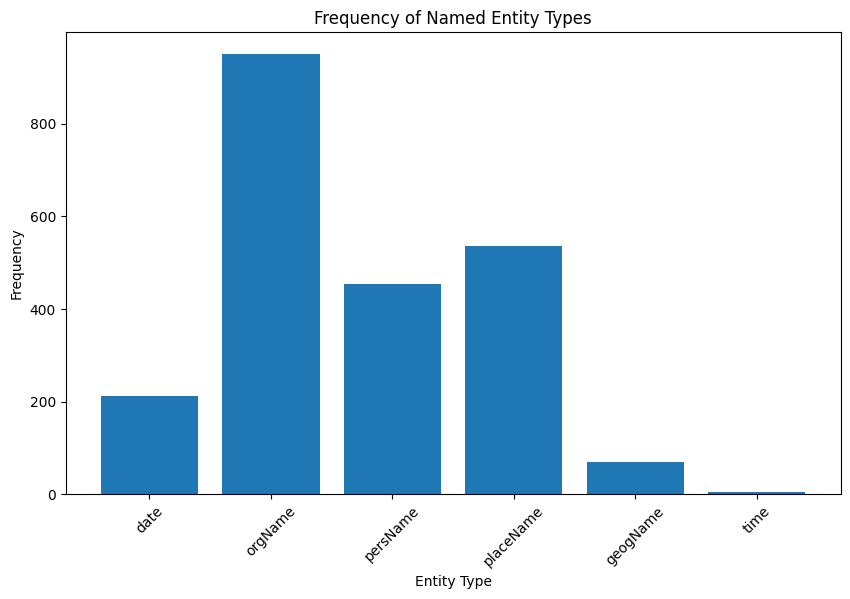

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(counter_entities.keys(), counter_entities.values())
plt.xlabel('Entity Type')
plt.ylabel('Frequency')
plt.title('Frequency of Named Entity Types')
plt.xticks(rotation=45)
plt.show()

In [39]:
entities_by_type = {}

for doc in docs:
    for ent in doc.ents:
        if ent.label_ not in entities_by_type:
            entities_by_type[ent.label_] = Counter()
        entities_by_type[ent.label_][ent.text] += 1

for label, counter in entities_by_type.items():
    print(f"Top 10 {label} entities:")
    for entity, count in counter.most_common(10):
        print(f"{entity}: {count}")
    print("\n")


Top 10 date entities:
2017 r.: 8
2014 r.: 8
2010 r.: 6
2014: 4
2016: 4
2011 roku: 4
grudniu: 3
2010 roku: 3
2011 r.: 3
2015 r.: 3


Top 10 orgName entities:
IRA: 57
IRS: 26
ETF: 22
FDIC: 16
Amazon: 16
Roth IRA: 14
Apple: 13
LLC: 12
CDO: 10
Google: 10


Top 10 persName entities:
Grahama: 10
Roth: 9
Jack: 7
Obama: 5
Tesla: 5
JP Morgan: 4
Paypal: 4
Sears: 4
clearXchange: 4
Rotha: 3


Top 10 placeName entities:
USA: 84
Stanach Zjednoczonych: 17
amerykańskie: 15
Wielkiej Brytanii: 13
Stany Zjednoczone: 12
Indiach: 12
Stanów Zjednoczonych: 11
kanadyjskie: 9
amerykańskich: 8
Kanadzie: 8


Top 10 geogName entities:
Europie: 7
Europy: 5
Ziemia: 3
Afryki: 3
Ameryki: 3
Białym Domu: 3
Afryce: 2
FDIC: 2
azjatycka: 2
McDonald's: 2


Top 10 time entities:
11: 1
1.: 1
65: 1
9.: 1




In [42]:
all_entities = []

for doc in docs:
    for ent in doc.ents:
        all_entities.append((ent.text, ent.label_))

entity_count = Counter(all_entities)

for entity, count in entity_count.most_common(50):
    print(f"{entity[0]} ({entity[1]}): {count}")


USA (placeName): 84
IRA (orgName): 57
IRS (orgName): 26
ETF (orgName): 22
Stanach Zjednoczonych (placeName): 17
FDIC (orgName): 16
Amazon (orgName): 16
amerykańskie (placeName): 15
Roth IRA (orgName): 14
Apple (orgName): 13
Wielkiej Brytanii (placeName): 13
LLC (orgName): 12
Stany Zjednoczone (placeName): 12
Indiach (placeName): 12
Stanów Zjednoczonych (placeName): 11
CDO (orgName): 10
Google (orgName): 10
Grahama (persName): 10
SPY (orgName): 9
Bank (orgName): 9
Fed (orgName): 9
kanadyjskie (placeName): 9
Roth (persName): 9
PE (orgName): 9
amerykańskich (placeName): 8
2017 r. (date): 8
FHA (orgName): 8
Kanadzie (placeName): 8
Uber (orgName): 8
2014 r. (date): 8
RMD (orgName): 8
Yelp (orgName): 8
amerykański (placeName): 7
Walmart (orgName): 7
Europie (geogName): 7
Jack (persName): 7
GE (orgName): 7
Microsoft (orgName): 7
unii (orgName): 7
Chiny (placeName): 6
Zimbabwe (placeName): 6
2010 r. (date): 6
Facebook (orgName): 6
Panasonic (orgName): 6
UE (orgName): 6
Venturo (orgName): 6
OPE

In [44]:
from spacy import displacy

counter_int = 1
for doc in docs:
    for sent in doc.sents:
        ents_in_sentence = [ent for ent in sent.ents]
        if len(ents_in_sentence) >= 2:
            print(f"Sentence: {sent.text}")
            displacy.render(sent, style='ent', page=True)
            counter_int += 1 

    if counter_int>4:
        break

Sentence: W sprawie z 1980 r. Sąd Najwyższy odrzucił ideę „ogólnego obowiązku pomiędzy wszystkimi uczestnikami transakcji rynkowych zaniechania działań na podstawie istotnych, niepublicznych informacji.


Sentence: Powiedz mi, co Citibank ma coś wspólnego z JP Morganem.


Sentence: Powiedz mi jeszcze raz, w jaki sposób JP Morgan jest odpowiedzialny za CDO i MBS.


Sentence: „**Kryzys naftowy 1973** Kryzys naftowy 1973 rozpoczął się w październiku 1973, kiedy członkowie Organizacji Arabskich Krajów Eksportujących Ropę Naftową ogłosili embargo naftowe.


Sentence: Embargo nastąpiło w odpowiedzi na poparcie Stanów Zjednoczonych dla Izraela podczas wojny Jom Kippur.


Sentence: Pod koniec embarga w marcu 1974 r. cena ropy wzrosła z 3 USD za baryłkę do prawie 12 USD na całym świecie; ceny w USA były znacznie wyższe.


# Answering the following questions:

#### Which of the method (counting expressions with capital letters vs. NER) worked better for the task concerned with identification of the proper names?

The ner work better. First of all it could find a companyName/product that started wit non capital letter like iPhone. It alse did consider the first word of each sentence so there was no issue with first capital letter. The only issue that ner could have is some uncommon proper names which he could not recognize uynlike the method with capital letters

#### What are the drawbacks of the method based on capital letters?

- Method based on the capital letters from the begining ditched the first word in a sentence. 
- The two words country names like `Stany Zjednoczone` will be split to `Stany` and `Zjednoczone`
- If a text has a person yelling like `ODDAJ MI MOJE PIENIĄDZE` this method will capture all words expect first

#### What are the drawbacks of the method based on NER?

- The labels has to be defined beforehand of extracting. So when we want to find all words with captial letters we need to have them labeled like `OrgName`, `PersName`
- Ner depends on the model we are using and most models are not multilingual so when i our polsih sentence the English word would appear we will not be abel to idendify it

#### Which of the coarse-grained NER groups has the best and which has the worst results? Try to justify this observation.

#### Do you think NER is sufficient for identifying different occurrences of the same entity (i.e. consider "USA" and "Stany Zjednoczone" and "Stany Zjednoczone Ameryki Północnej")? If not, can you suggest an algorithm or a tool that would be able to group such names together?

No. Considering the exercises i just did, the ner distingiush the `USA` and `Stany Zjednoczone`. To help ner connect thos entities we can use `EntityLinker`. https://spacy.io/api/entitylinker


#### Can you think of a real world problem that would benefit the most from application of Named Entity Recognition algorithm?

- The google search, when a user is typing a single word like a Tesla, the NER can categorize the subject of user intention for `Company` or `Person`
- Recomendation system. Let's consider the website with articles, based on tags that are in artcicle which can be extracted via ner. For example user read article about Tesla which in most cases coudl be a car or tech-company but this user read about scientist. So thanks to ner (which extracted from sentence that it is about a man) we can recommend user a new historical scientist.
- Mail aggregation. We can write a bot that will read all mails we got from the mailbox. Based on most popular entities we can aggreate mails to categories. Let's consider the following example. We are a big hiring company and we need 3 new people one cook, one computer scientist and one driver. We can aggregate all mails from a resume mail and segrate all resumes for HR deparment.
- User feedback. Let's consider that we are a small financial company with a report box. We can categorize all user requets by ner, like one about our bank account issues or one about website issues.